<a href="https://colab.research.google.com/github/LeyloJohnny/First-ML/blob/main/SGD_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 7.0MB/s 
     |████████████████████████████████| 1.2MB 16.0MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 194kB 35.6MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 776.8MB 21kB/s 
     |████████████████████████████████| 12.8MB 56.7MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [3]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

Idea of the example: Speed of a roller coaster over time.

In [48]:
#define time tensor
time = torch.arange(0,20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

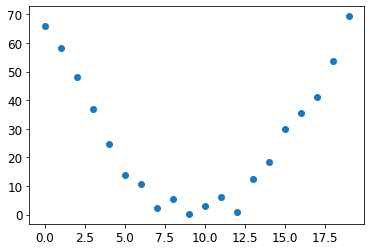

In [53]:
#define speed function as a simple quadratic function, adding a bit of noise by using random numbers
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

Distinguish clearly between the function's input (the time when we are measuring the coaster's speed: t) and its parameters (the values that define which quadratic we're trying, param). 

So, let's collect the parameters in one argument and thus separate the input, t, and the parameters, params, in the function's signature: 

In [54]:
#let's just guess it's a quadratic function, defined by three parameters a, b, and c
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

**Step one:** Initialize parameters

In [82]:
#parameters are randomly initialized, requires_grad --> tell PyTorch that we want to keep track of the gradients
params = torch.randn(3).requires_grad_()

In [83]:
#keep original parameters 
orig_params = params.clone()

**Step 2:** Calculate the predictions

In [84]:
#calculate the predictions: 
preds = f(time, params)

In [85]:
#create a function to visualize how close our predictions are to the targets:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

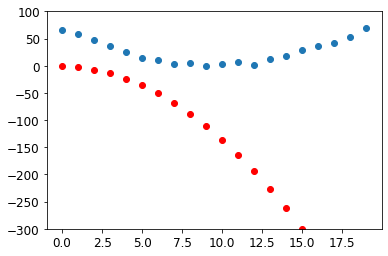

In [86]:
#this looks shitty
show_preds(preds)

**Step 3:** Calculate the loss

In [87]:
#let's evaluate it by calculating the loss
loss = mse(preds, speed)
loss
#now we need to improve this loss

TensorBase(61624.2266, grad_fn=<AliasBackward>)

**Step 4:** Calculate the gradients

In [88]:
#Calculate the gradients (an approximation of how the parameters need to change)
loss.backward()
params.grad

tensor([-82815.9766,  -5326.2920,   -385.1207])

In [89]:
#the gradients can be used to improve our parameters
params

tensor([-1.2842, -0.6917, -0.5359], requires_grad=True)

**Step 5:** Step the weights

In [90]:
#define a learning rate
lr = 1e-5
#update parameters using the learning rate and the gradients
params.data -= lr * params.grad.data
#delete value of gradients?
params.grad = None

Short explaination here: To calculate the gradients we call backward on the loss. Loss was itself calculated by mse, which took preds as an input, which was calculated using f taking as an input params, which was the object on which we originally called required_grads_— which is the original call that now allows us to call backward on loss. 

In [91]:
#has the loss improved?
preds = f(time,params)
mse(preds, speed)

TensorBase(12209.7520, grad_fn=<AliasBackward>)

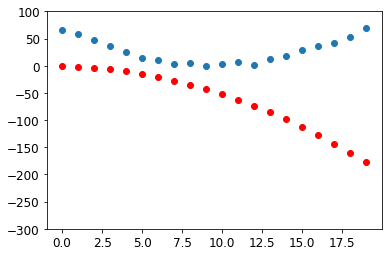

In [92]:
#let's see:
show_preds(preds)

In [ ]:
#yaaaaaaaaay

Let's make it a function to apply one step:

In [93]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

**Step 6:** Repeat the process

In [110]:
for i in range(10): apply_step(params)
#the loss is decreasing!

676.2958374023438
676.2899780273438
676.2841796875
676.2784423828125
676.2725830078125
676.266845703125
676.260986328125
676.2552490234375
676.2494506835938
676.2437744140625


In [111]:
#hide
params = orig_params.detach().requires_grad_()

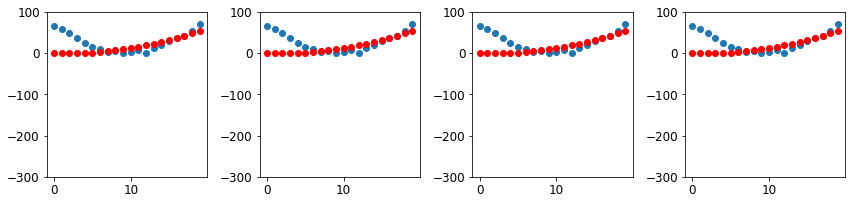

In [112]:
#let's visualize this:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
#tight_layout could be plt.show(), both works
plt.tight_layout()

**Step 7:** Stop

In [ ]:
#easy, done.